# Differece B/W Metrics r2_score and Adjusted r2_score

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv('placement_cgpa_package.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

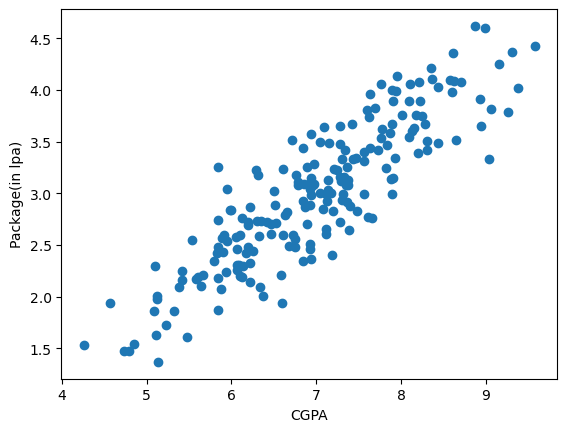

In [45]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [46]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [49]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0, 0.5, 'Package(in lpa)')

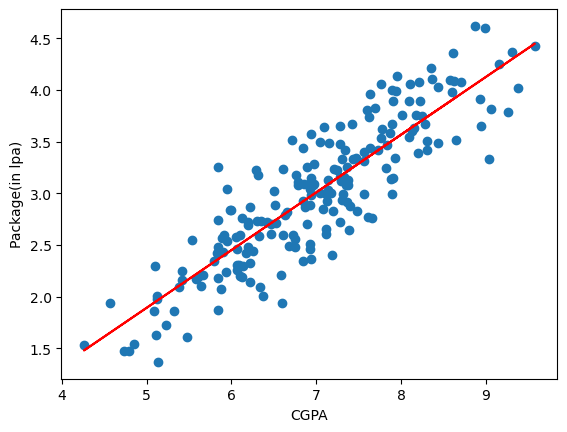

In [50]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [52]:
#predicted output
y_pred = lr.predict(X_test)
y_pred    

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [53]:
#Actual output
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

## MAE && MSE && RMSE && R2_Score

In [54]:
print("MAE : ", mean_absolute_error(y_test,y_pred))
print("MSE : ", mean_squared_error(y_test,y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_test,y_pred)))

MAE :  0.2884710931878175
MSE :  0.12129235313495527
RMSE :  0.34827051717731616


In [55]:
print("R2_SCORE : ", r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2_SCORE :  0.780730147510384


### Adjusted R2 Score = 1 - ((1-r2)*(n-1) / (n-k-1))  where n = no. of rows and  k = no. of features

In [56]:
X_test.shape

(40, 1)

In [68]:
#Add useless feature: R² will increases n=40(rows), k=1(feature)
1-((1-r2)*(40-1)/(40-1-1))

0.773092910598533

## Adding a UseLess Column named Random_Feature

In [69]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)  # Adds random column Values between 0 and 1

new_df1 = new_df1[['cgpa','random_feature','package']] # random_feature : Simulate a useless feature
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.851385,3.26
1,5.12,0.439457,1.98
2,7.82,0.521111,3.25
3,7.42,0.694119,3.67
4,6.94,0.519526,3.57


Text(0, 0.5, 'Package(in lpa)')

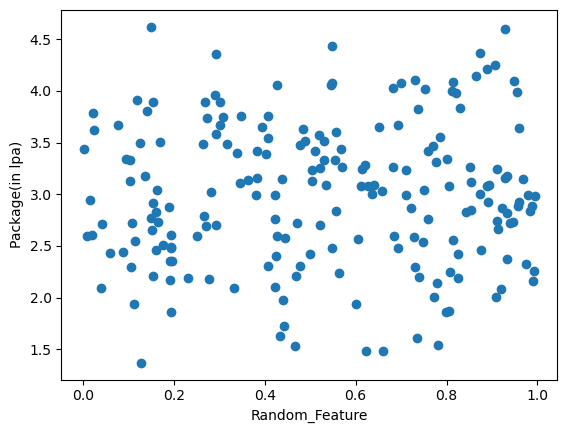

In [70]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('Random_Feature')
plt.ylabel('Package(in lpa)')

In [71]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [73]:
lr = LinearRegression()

In [74]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [75]:
y_pred = lr.predict(X_test)

### R2_Score

In [76]:
print('R2 Score : ', r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score :  0.7713082909434732


### Adjusted R2_Score

In [77]:
X_test.shape

(40, 2)

In [78]:
1 - ((1-r2)*(40-1) / (40-1-2))

0.7589465769404177

## Adding a new Usefulu Column named IQ

In [80]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa','iq','package']]

In [81]:
new_df2.sample(5)

,cgpa,iq,package
183,7.28,2.12,2.72
77,8.99,3.90,4.60
154,7.08,2.65,2.85
177,7.09,4.04,3.64
89,6.42,1.82,2.72


Text(0, 0.5, 'Package(in lpa)')

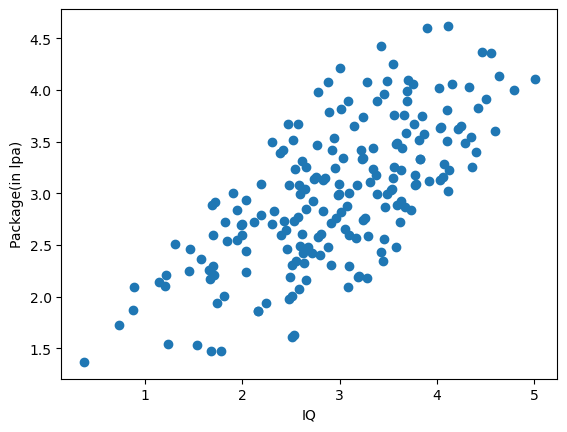

In [82]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('IQ')
plt.ylabel('Package(in lpa)')

In [92]:
np.random.randint(-100,100)

-14

In [93]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [95]:
lr = LinearRegression()

In [96]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [97]:
y_pred = lr.predict(X_test)

### R2_Score

In [98]:
print('R2 Score : ', r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score :  0.8393427113222331


### Adjusted R2_Score

In [99]:
X_test.shape

(40, 2)

In [100]:
1 - ((1-r2)*(40-1) / (40-1-2))

0.8306585335558674